<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['host_response_rate']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: host_response_rate
Non-Null Count  Dtype 
--------------  ----- 
16037 non-null  object
dtypes: object(1)
memory usage: 148.0+ KB


In [7]:
Barcelona['host_response_rate'] = pd.to_numeric(
    Barcelona['host_response_rate'].astype(str).str.replace('%', ''),
    errors='coerce'
)

In [8]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['host_response_rate'].max()
Min=Barcelona['host_response_rate'].min()
Limites= [Min, Max]
Limites

[0.0, 100.0]

In [9]:
#Calculamos el rango R
R=Max-Min
R

100.0

In [10]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [11]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

6.377640644157816

**Creación de Categorias a partir de clases**

In [12]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 100.1, 16)
intervalos

array([-1.000e-01,  6.580e+00,  1.326e+01,  1.994e+01,  2.662e+01,
        3.330e+01,  3.998e+01,  4.666e+01,  5.334e+01,  6.002e+01,
        6.670e+01,  7.338e+01,  8.006e+01,  8.674e+01,  9.342e+01,
        1.001e+02])

In [13]:
#Creamos las categorías 
categorias= ["Categoría1 (0-6.6 host_response_rate)", "Categoría2 (6.7-1.4 host_response_rate)","Categoría3 (1.5-2 host_response_rate)", "Categoría4 (2.1-2.7 host_response_rate)",
             "Categoría5 (2.8-3.4 host_response_rate)", "Categoría6 (3.5-4 host_response_rate)","Categoría7 (4.1-5.4 host_response_rate)", "Categoría8 (5.5-6.1 host_response_rate)", "Categoría9 (6.2-6.7 host_response_rate)", "Categoría10 (6.8-7.4 host_response_rate)","Categoría11 (7.5-8.1 host_response_rate)", "Categoría12 (8.2-8.7 host_response_rate)",
             "Categoría13 (8.8-9.4 host_response_rate)", "Categoría14 (9.5-1.1 host_response_rate)","Categoría15 (1.2 host_response_rate)"
             ]

In [14]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['host_response_rate']=pd.cut(x= Barcelona['host_response_rate'], bins=intervalos, labels= categorias)
Barcelona['host_response_rate']

0            Categoría15 (1.2 host_response_rate)
1            Categoría15 (1.2 host_response_rate)
2            Categoría15 (1.2 host_response_rate)
3        Categoría12 (8.2-8.7 host_response_rate)
4        Categoría14 (9.5-1.1 host_response_rate)
5            Categoría15 (1.2 host_response_rate)
6            Categoría15 (1.2 host_response_rate)
7                                             NaN
8            Categoría15 (1.2 host_response_rate)
9            Categoría15 (1.2 host_response_rate)
10                                            NaN
11                                            NaN
12       Categoría12 (8.2-8.7 host_response_rate)
13                                            NaN
14           Categoría15 (1.2 host_response_rate)
15           Categoría15 (1.2 host_response_rate)
16       Categoría14 (9.5-1.1 host_response_rate)
17           Categoría15 (1.2 host_response_rate)
18       Categoría14 (9.5-1.1 host_response_rate)
19           Categoría15 (1.2 host_response_rate)


In [15]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['host_response_rate'].value_counts().reset_index()
Tabla_freq

host_response_rate  count
0       Categoría15 (1.2 host_response_rate)  11856
1   Categoría14 (9.5-1.1 host_response_rate)   1886
2   Categoría12 (8.2-8.7 host_response_rate)    634
3   Categoría13 (8.8-9.4 host_response_rate)    537
4    Categoría8 (5.5-6.1 host_response_rate)    234
5      Categoría1 (0-6.6 host_response_rate)    194
6   Categoría11 (7.5-8.1 host_response_rate)    157
7      Categoría3 (1.5-2 host_response_rate)    150
8    Categoría9 (6.2-6.7 host_response_rate)    146
9    Categoría7 (4.1-5.4 host_response_rate)     61
10  Categoría10 (6.8-7.4 host_response_rate)     61
11   Categoría4 (2.1-2.7 host_response_rate)     46
12   Categoría5 (2.8-3.4 host_response_rate)     36
13     Categoría6 (3.5-4 host_response_rate)     21
14   Categoría2 (6.7-1.4 host_response_rate)     18

In [16]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

host_response_rate  count
0       Categoría15 (1.2 host_response_rate)  11856
1   Categoría14 (9.5-1.1 host_response_rate)   1886
2   Categoría12 (8.2-8.7 host_response_rate)    634
3   Categoría13 (8.8-9.4 host_response_rate)    537
4    Categoría8 (5.5-6.1 host_response_rate)    234
5      Categoría1 (0-6.6 host_response_rate)    194
6   Categoría11 (7.5-8.1 host_response_rate)    157
7      Categoría3 (1.5-2 host_response_rate)    150
8    Categoría9 (6.2-6.7 host_response_rate)    146
9    Categoría7 (4.1-5.4 host_response_rate)     61
10  Categoría10 (6.8-7.4 host_response_rate)     61
11   Categoría4 (2.1-2.7 host_response_rate)     46
12   Categoría5 (2.8-3.4 host_response_rate)     36
13     Categoría6 (3.5-4 host_response_rate)     21
14   Categoría2 (6.7-1.4 host_response_rate)     18

In [17]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_response_rate')
Filtro_index

count
host_response_rate                             
Categoría15 (1.2 host_response_rate)      11856
Categoría14 (9.5-1.1 host_response_rate)   1886
Categoría12 (8.2-8.7 host_response_rate)    634
Categoría13 (8.8-9.4 host_response_rate)    537
Categoría8 (5.5-6.1 host_response_rate)     234
Categoría1 (0-6.6 host_response_rate)       194
Categoría11 (7.5-8.1 host_response_rate)    157
Categoría3 (1.5-2 host_response_rate)       150
Categoría9 (6.2-6.7 host_response_rate)     146
Categoría7 (4.1-5.4 host_response_rate)      61
Categoría10 (6.8-7.4 host_response_rate)     61
Categoría4 (2.1-2.7 host_response_rate)      46
Categoría5 (2.8-3.4 host_response_rate)      36
Categoría6 (3.5-4 host_response_rate)        21
Categoría2 (6.7-1.4 host_response_rate)      18

Text(0, 0.5, 'Frecuencia')

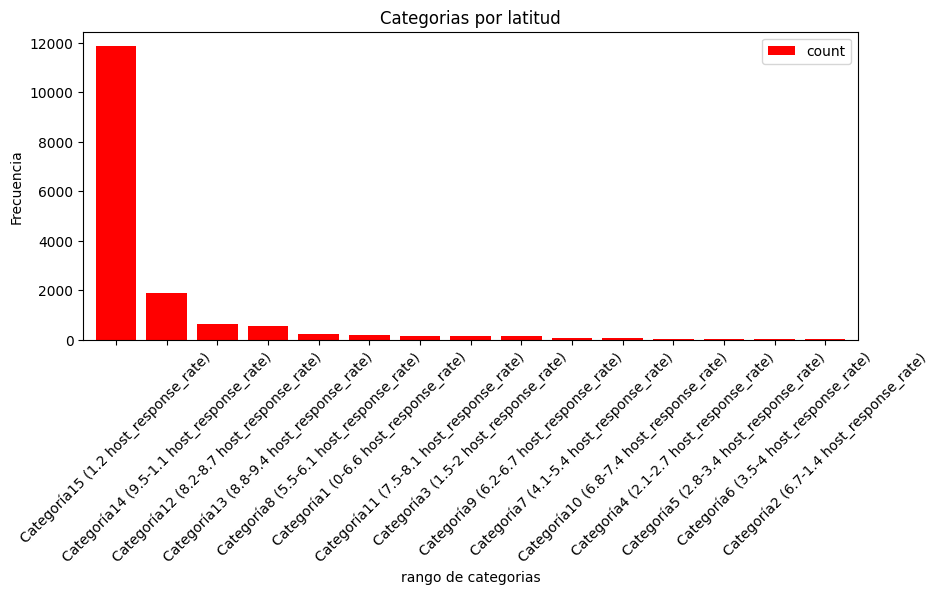

In [18]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')